In [1]:
import pandas as pd

In [2]:
df = pd.read_csv(filepath_or_buffer='C:\\Users\\alexb\\StravaCompleteInitial.csv')

In [3]:
df.head()

,Rank,Name,Date,Pace in /mi,HR in bpm,Time
0,1,Jack Rowe,17/10/2021,04:41,171,00:47:21
1,2,Andy Vernon,21/10/2018,04:43,NaN,00:47:31
2,3,Joshua Grace,16/10/2022,04:47,177,00:48:33
3,4,Alex Teuten,22/10/2017,04:49,NaN,00:48:34
4,5,Ben Connor,22/10/2017,04:49,NaN,00:48:35


In [4]:
df.describe(include='all')

,Rank,Name,Date,Pace in /mi,HR in bpm,Time
count,21614.000000,21614,21614,21614,21614,21614
unique,NaN,18199,34,684,127,4890
top,NaN,Michelle Jones,17/10/2021,08:42,NaN,01:24:55
freq,NaN,6,4253,110,10781,19
mean,10807.500000,NaN,NaN,NaN,NaN,NaN
std,6239.568695,NaN,NaN,NaN,NaN,NaN
min,1.000000,NaN,NaN,NaN,NaN,NaN
25%,5404.250000,NaN,NaN,NaN,NaN,NaN
50%,10807.500000,NaN,NaN,NaN,NaN,NaN
75%,16210.750000,NaN,NaN,NaN,NaN,NaN


In [5]:
df.head(1000)

,Rank,Name,Date,Pace in /mi,HR in bpm,Time
0,1,Jack Rowe,17/10/2021,04:41,171,00:47:21
1,2,Andy Vernon,21/10/2018,04:43,NaN,00:47:31
2,3,Joshua Grace,16/10/2022,04:47,177,00:48:33
3,4,Alex Teuten,22/10/2017,04:49,NaN,00:48:34
4,5,Ben Connor,22/10/2017,04:49,NaN,00:48:35
...,...,...,...,...,...,...
995,996,Nick Slade,22/10/2017,06:36,NaN,01:06:29
996,997,Arthur Tye,21/10/2018,06:32,NaN,01:06:30
997,998,Simon Logan,20/10/2019,06:35,180,01:06:30
998,999,Gareth Charles,17/10/2021,06:35,168,01:06:30


In [6]:
df['HR in bpm'] = pd.to_numeric(df['HR in bpm'], errors='coerce')
print(df['HR in bpm'])

0        171.0
1          NaN
2        177.0
3          NaN
4          NaN
         ...  
21609    144.0
21610    139.0
21611      NaN
21612    123.0
21613    163.0
Name: HR in bpm, Length: 21614, dtype: float64


In [7]:
df.dtypes

Rank             int64
Name            object
Date            object
Pace in /mi     object
HR in bpm      float64
Time            object
dtype: object

In [8]:
df.isna().sum()

Rank               0
Name               0
Date               0
Pace in /mi        0
HR in bpm      10781
Time               0
dtype: int64

In [9]:
HR = df['HR in bpm']
mask = HR.notnull()
non_nan_hr = HR[mask]


In [10]:
import matplotlib.pyplot as plt

<Axes: ylabel='Frequency'>

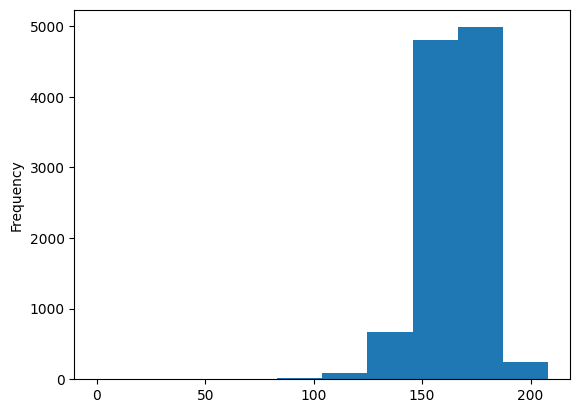

In [11]:
non_nan_hr.plot(kind='hist', )

In [12]:
non_nan_hr.sort_values()

11115      0.0
18560     45.0
2148      52.0
13324     62.0
8724      69.0
         ...  
18545    202.0
13194    202.0
55       203.0
2580     204.0
176      208.0
Name: HR in bpm, Length: 10833, dtype: float64

In [13]:
non_nan_hr = non_nan_hr.drop(11115)

In [14]:
non_nan_hr.sort_values()

18560     45.0
2148      52.0
13324     62.0
8724      69.0
21516     70.0
         ...  
18545    202.0
13194    202.0
55       203.0
2580     204.0
176      208.0
Name: HR in bpm, Length: 10832, dtype: float64

In [15]:
df.Time.head()

0    00:47:21
1    00:47:31
2    00:48:33
3    00:48:34
4    00:48:35
Name: Time, dtype: object

(100.0, 210.0)

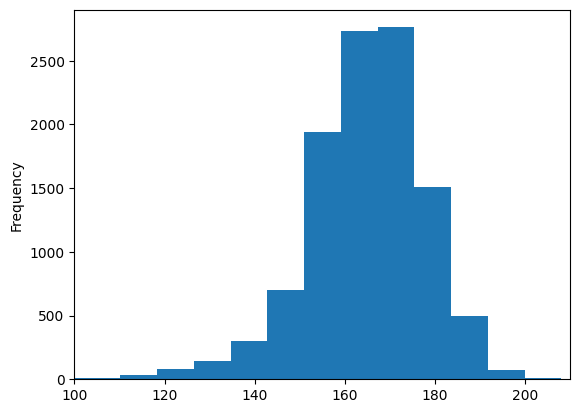

In [16]:
non_nan_hr.plot(kind='hist', bins=20)
plt.xlim(100,210)

In [17]:
unique_dates = df['Date'].unique()
print(unique_dates)

['17/10/2021' '21/10/2018' '16/10/2022' '22/10/2017' '20/10/2019'
 '23/10/2016' '25/10/2015' '26/10/2014' '28/10/2012' '27/10/2013'
 '30/10/2011' '24/10/2010' '28/10/2013' '25/10/2009' '22/10/2016'
 '26/10/2008' '22/10/2006' '09/10/2005' '28/10/2007' '24/10/2016'
 '21/10/2016' '20/10/2015' '19/10/2019' '24/10/2015' '13/11/2016'
 '22/10/2015' '01/01/2017' '16/10/2016' '19/10/2016' '20/10/2017'
 '21/10/2015' '16/10/2021' '07/10/2016' '17/10/2017']


In [18]:
import pandas as pd

df['Date_time'] = pd.to_datetime(df.Date)

C:\Users\alexb\AppData\Local\Temp\ipykernel_10236\1505822805.py:3: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df['Date_time'] = pd.to_datetime(df.Date)


In [19]:
df.dtypes

Rank                    int64
Name                   object
Date                   object
Pace in /mi            object
HR in bpm             float64
Time                   object
Date_time      datetime64[ns]
dtype: object

In [20]:
df.Date_time.dt.year.value_counts()

Date_time
2021    4254
2018    3916
2019    3443
2017    3293
2016    2079
2022    2052
2015    1151
2014     764
2013     388
2012     175
2011      57
2010      29
2009       5
2007       3
2008       2
2006       2
2005       1
Name: count, dtype: int64

(2005.0, 2022.0)

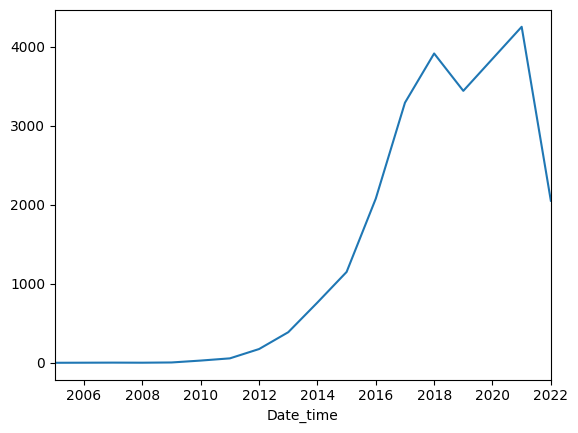

In [21]:
df.Date_time.dt.year.value_counts().sort_index().plot()
plt.xlim(2005,2022)

In [22]:
from datetime import time, timedelta

In [23]:
df

,Rank,Name,Date,Pace in /mi,HR in bpm,Time,Date_time
0,1,Jack Rowe,17/10/2021,04:41,171.0,00:47:21,2021-10-17
1,2,Andy Vernon,21/10/2018,04:43,NaN,00:47:31,2018-10-21
2,3,Joshua Grace,16/10/2022,04:47,177.0,00:48:33,2022-10-16
3,4,Alex Teuten,22/10/2017,04:49,NaN,00:48:34,2017-10-22
4,5,Ben Connor,22/10/2017,04:49,NaN,00:48:35,2017-10-22
...,...,...,...,...,...,...,...
21609,21610,Lauren Storey,17/10/2021,18:23,144.0,03:06:19,2021-10-17
21610,21611,Jean Morris,17/10/2021,18:33,139.0,03:07:54,2021-10-17
21611,21612,Luke Edmunds,22/10/2017,18:49,NaN,03:09:41,2017-10-22
21612,21613,Marie Stopinski NaNWheeler,17/10/2021,18:48,123.0,03:10:31,2021-10-17


In [24]:
new_time_seconds = []
for i,time in enumerate(df['Time']):
    h,m,s = time.split(':')
    time1 = int(timedelta(hours=int(h),minutes=int(m),seconds=int(s)).total_seconds())
    new_time_seconds.append(time1)

df['Time_seconds'] = new_time_seconds

In [25]:
df

,Rank,Name,Date,Pace in /mi,HR in bpm,Time,Date_time,Time_seconds
0,1,Jack Rowe,17/10/2021,04:41,171.0,00:47:21,2021-10-17,2841
1,2,Andy Vernon,21/10/2018,04:43,NaN,00:47:31,2018-10-21,2851
2,3,Joshua Grace,16/10/2022,04:47,177.0,00:48:33,2022-10-16,2913
3,4,Alex Teuten,22/10/2017,04:49,NaN,00:48:34,2017-10-22,2914
4,5,Ben Connor,22/10/2017,04:49,NaN,00:48:35,2017-10-22,2915
...,...,...,...,...,...,...,...,...
21609,21610,Lauren Storey,17/10/2021,18:23,144.0,03:06:19,2021-10-17,11179
21610,21611,Jean Morris,17/10/2021,18:33,139.0,03:07:54,2021-10-17,11274
21611,21612,Luke Edmunds,22/10/2017,18:49,NaN,03:09:41,2017-10-22,11381
21612,21613,Marie Stopinski NaNWheeler,17/10/2021,18:48,123.0,03:10:31,2021-10-17,11431


In [26]:
df

,Rank,Name,Date,Pace in /mi,HR in bpm,Time,Date_time,Time_seconds
0,1,Jack Rowe,17/10/2021,04:41,171.0,00:47:21,2021-10-17,2841
1,2,Andy Vernon,21/10/2018,04:43,NaN,00:47:31,2018-10-21,2851
2,3,Joshua Grace,16/10/2022,04:47,177.0,00:48:33,2022-10-16,2913
3,4,Alex Teuten,22/10/2017,04:49,NaN,00:48:34,2017-10-22,2914
4,5,Ben Connor,22/10/2017,04:49,NaN,00:48:35,2017-10-22,2915
...,...,...,...,...,...,...,...,...
21609,21610,Lauren Storey,17/10/2021,18:23,144.0,03:06:19,2021-10-17,11179
21610,21611,Jean Morris,17/10/2021,18:33,139.0,03:07:54,2021-10-17,11274
21611,21612,Luke Edmunds,22/10/2017,18:49,NaN,03:09:41,2017-10-22,11381
21612,21613,Marie Stopinski NaNWheeler,17/10/2021,18:48,123.0,03:10:31,2021-10-17,11431


In [27]:
df['Time_seconds'] = df.Time_seconds.astype(int)

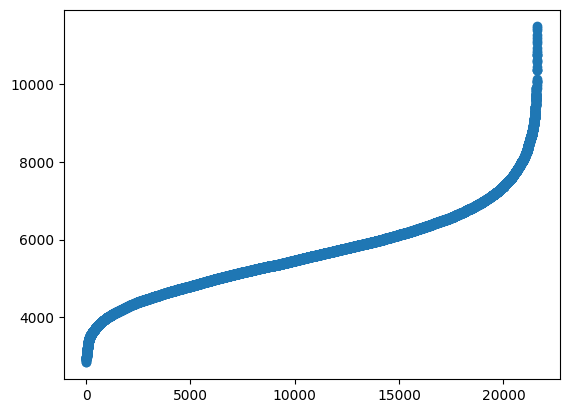

In [28]:
y = df['Time_seconds']
plt.plot(y, 'o')
plt.show()

In [29]:
import seaborn as sns

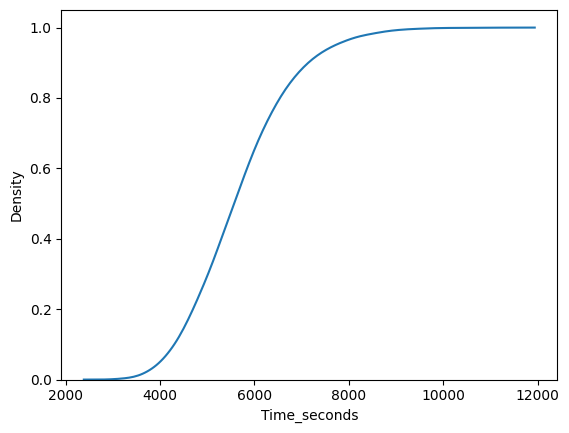

In [30]:
sns.kdeplot(df['Time_seconds'], cumulative=True)
plt.show()

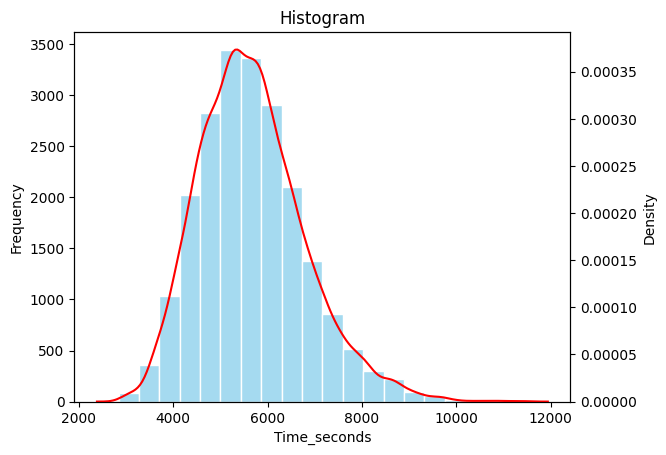

In [31]:
fig, ax1 = plt.subplots()



sns.histplot(df['Time_seconds'], bins=20, kde=False, color='skyblue', edgecolor='white', ax=ax1)

ax1.set_xlabel('Time_seconds')
ax1.set_ylabel('Frequency')
ax1.set_title('Histogram')

ax2 = ax1.twinx()


sns.kdeplot(df['Time_seconds'], color='red', ax=ax2)
#plt.xlim(2000,10000)
ax2.set_ylabel('Density')

plt.show()

In [32]:
df

,Rank,Name,Date,Pace in /mi,HR in bpm,Time,Date_time,Time_seconds
0,1,Jack Rowe,17/10/2021,04:41,171.0,00:47:21,2021-10-17,2841
1,2,Andy Vernon,21/10/2018,04:43,NaN,00:47:31,2018-10-21,2851
2,3,Joshua Grace,16/10/2022,04:47,177.0,00:48:33,2022-10-16,2913
3,4,Alex Teuten,22/10/2017,04:49,NaN,00:48:34,2017-10-22,2914
4,5,Ben Connor,22/10/2017,04:49,NaN,00:48:35,2017-10-22,2915
...,...,...,...,...,...,...,...,...
21609,21610,Lauren Storey,17/10/2021,18:23,144.0,03:06:19,2021-10-17,11179
21610,21611,Jean Morris,17/10/2021,18:33,139.0,03:07:54,2021-10-17,11274
21611,21612,Luke Edmunds,22/10/2017,18:49,NaN,03:09:41,2017-10-22,11381
21612,21613,Marie Stopinski NaNWheeler,17/10/2021,18:48,123.0,03:10:31,2021-10-17,11431


In [33]:
df['Run_year'] = df['Date_time'].dt.year

<Axes: xlabel='Run_year'>

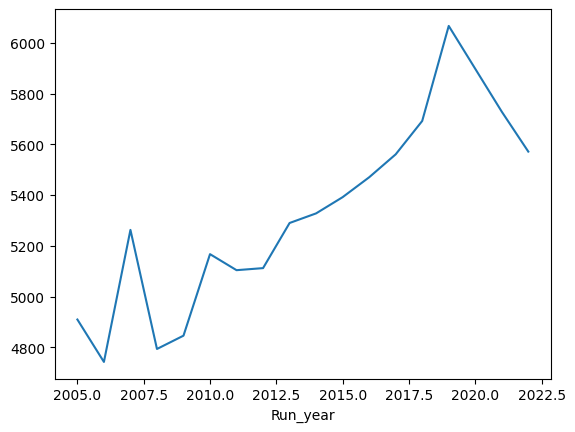

In [34]:
df.groupby('Run_year').Time_seconds.mean().plot()

<Axes: xlabel='Run_year'>

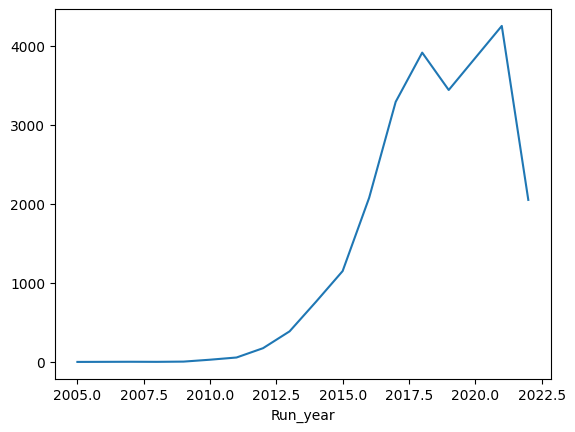

In [35]:
df.groupby('Run_year').Time_seconds.count().plot()

<Axes: xlabel='Run_year'>

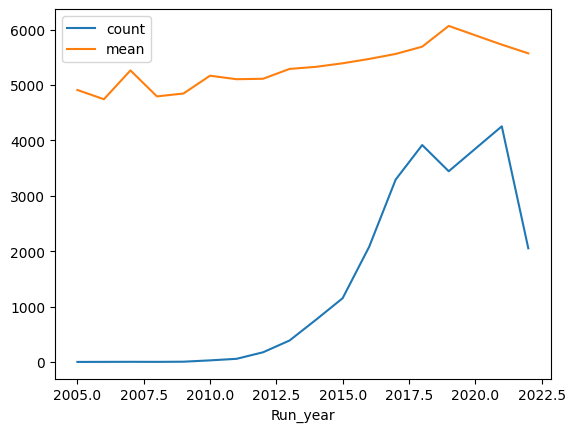

In [36]:
df.groupby('Run_year')['Time_seconds'].agg(['count', 'mean']).plot()

In [37]:
df.set_index('Rank', inplace=True)

In [38]:
df

,Name,Date,Pace in /mi,HR in bpm,Time,Date_time,Time_seconds,Run_year
Rank,,,,,,,,
1,Jack Rowe,17/10/2021,04:41,171.0,00:47:21,2021-10-17,2841,2021
2,Andy Vernon,21/10/2018,04:43,NaN,00:47:31,2018-10-21,2851,2018
3,Joshua Grace,16/10/2022,04:47,177.0,00:48:33,2022-10-16,2913,2022
4,Alex Teuten,22/10/2017,04:49,NaN,00:48:34,2017-10-22,2914,2017
5,Ben Connor,22/10/2017,04:49,NaN,00:48:35,2017-10-22,2915,2017
...,...,...,...,...,...,...,...,...
21610,Lauren Storey,17/10/2021,18:23,144.0,03:06:19,2021-10-17,11179,2021
21611,Jean Morris,17/10/2021,18:33,139.0,03:07:54,2021-10-17,11274,2021
21612,Luke Edmunds,22/10/2017,18:49,NaN,03:09:41,2017-10-22,11381,2017


In [39]:
df

,Name,Date,Pace in /mi,HR in bpm,Time,Date_time,Time_seconds,Run_year
Rank,,,,,,,,
1,Jack Rowe,17/10/2021,04:41,171.0,00:47:21,2021-10-17,2841,2021
2,Andy Vernon,21/10/2018,04:43,NaN,00:47:31,2018-10-21,2851,2018
3,Joshua Grace,16/10/2022,04:47,177.0,00:48:33,2022-10-16,2913,2022
4,Alex Teuten,22/10/2017,04:49,NaN,00:48:34,2017-10-22,2914,2017
5,Ben Connor,22/10/2017,04:49,NaN,00:48:35,2017-10-22,2915,2017
...,...,...,...,...,...,...,...,...
21610,Lauren Storey,17/10/2021,18:23,144.0,03:06:19,2021-10-17,11179,2021
21611,Jean Morris,17/10/2021,18:33,139.0,03:07:54,2021-10-17,11274,2021
21612,Luke Edmunds,22/10/2017,18:49,NaN,03:09:41,2017-10-22,11381,2017


In [40]:
dates = df.Date_time.value_counts()
dates.columns = ['Date', 'Number_Runs']
dates
df1 = pd.DataFrame()
run_dates = [dates[dates > 5]]
# run_dates.columns = ['Date', 'Number_runs']
run_dates


[Date_time
 2021-10-17    4253
 2018-10-21    3916
 2019-10-20    3442
 2017-10-22    3290
 2016-10-23    2071
 2022-10-16    2052
 2015-10-25    1147
 2014-10-26     764
 2013-10-27     387
 2012-10-28     175
 2011-10-30      57
 2010-10-24      29
 Name: count, dtype: int64]

In [41]:
dates = df['Date_time'].value_counts()
dates = dates[dates>5]
# Create the run_dates DataFrame
run_dates = pd.DataFrame({'Date': dates.index, 'Number_Runs': dates.values})
run_dates

,Date,Number_Runs
0,2021-10-17,4253
1,2018-10-21,3916
2,2019-10-20,3442
3,2017-10-22,3290
4,2016-10-23,2071
5,2022-10-16,2052
6,2015-10-25,1147
7,2014-10-26,764
8,2013-10-27,387
9,2012-10-28,175


In [42]:
filtered_df = df[df['Date_time'].isin(run_dates['Date'])]


In [43]:
df

,Name,Date,Pace in /mi,HR in bpm,Time,Date_time,Time_seconds,Run_year
Rank,,,,,,,,
1,Jack Rowe,17/10/2021,04:41,171.0,00:47:21,2021-10-17,2841,2021
2,Andy Vernon,21/10/2018,04:43,NaN,00:47:31,2018-10-21,2851,2018
3,Joshua Grace,16/10/2022,04:47,177.0,00:48:33,2022-10-16,2913,2022
4,Alex Teuten,22/10/2017,04:49,NaN,00:48:34,2017-10-22,2914,2017
5,Ben Connor,22/10/2017,04:49,NaN,00:48:35,2017-10-22,2915,2017
...,...,...,...,...,...,...,...,...
21610,Lauren Storey,17/10/2021,18:23,144.0,03:06:19,2021-10-17,11179,2021
21611,Jean Morris,17/10/2021,18:33,139.0,03:07:54,2021-10-17,11274,2021
21612,Luke Edmunds,22/10/2017,18:49,NaN,03:09:41,2017-10-22,11381,2017


In [44]:
filtered_df

,Name,Date,Pace in /mi,HR in bpm,Time,Date_time,Time_seconds,Run_year
Rank,,,,,,,,
1,Jack Rowe,17/10/2021,04:41,171.0,00:47:21,2021-10-17,2841,2021
2,Andy Vernon,21/10/2018,04:43,NaN,00:47:31,2018-10-21,2851,2018
3,Joshua Grace,16/10/2022,04:47,177.0,00:48:33,2022-10-16,2913,2022
4,Alex Teuten,22/10/2017,04:49,NaN,00:48:34,2017-10-22,2914,2017
5,Ben Connor,22/10/2017,04:49,NaN,00:48:35,2017-10-22,2915,2017
...,...,...,...,...,...,...,...,...
21610,Lauren Storey,17/10/2021,18:23,144.0,03:06:19,2021-10-17,11179,2021
21611,Jean Morris,17/10/2021,18:33,139.0,03:07:54,2021-10-17,11274,2021
21612,Luke Edmunds,22/10/2017,18:49,NaN,03:09:41,2017-10-22,11381,2017


In [45]:

# Read data from the notepad file
with open(r'C:\\Users\\alexb\\Downloads\\run_conditions.txt', 'r') as file:
    lines = file.readlines()


# Process the data and convert it into a list of dictionaries
data = []
current_date = None
for line in lines:
    line = line.strip()
    if line:
        if '-' in line:
            current_date = line
        else:
            values = line.split('\t')
            data.append({'Date': current_date, 'Rain_Total': values[0], 'Wind_Average': values[1], 'Temperature_Mean': values[2]})

# Create a DataFrame from the data list
df1 = pd.DataFrame(data)
# Create a DataFrame from the numbers list
df1.drop([0], axis=0, inplace=True)
df1

,Date,Rain_Total,Wind_Average,Temperature_Mean
1,2021-10-17,0.9,9.75,11.6
2,2018-10-21,0,4.3,8.3
3,2019-10-20,0,11.575,6.9
4,2017-10-22,0,19.25,9.9
5,2016-10-23,0,17.65,8.1
6,2022-10-16,0,5.45,11.7
7,2015-10-25,0,1.7,4.2
8,2014-10-26,0.2,14.35,13.9
9,2013-10-27,0,24.075,12.7
10,2012-10-28,0.4,9.125,2.4


In [46]:
filtered_df['Date'] = filtered_df['Date_time']
filtered_df.drop('Date_time', axis=1, inplace=True)


C:\Users\alexb\AppData\Local\Temp\ipykernel_10236\1493047035.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['Date'] = filtered_df['Date_time']
C:\Users\alexb\AppData\Local\Temp\ipykernel_10236\1493047035.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df.drop('Date_time', axis=1, inplace=True)


In [47]:
df1['Date'] = pd.to_datetime(df1.Date)
df1.dtypes

Date                datetime64[ns]
Rain_Total                  object
Wind_Average                object
Temperature_Mean            object
dtype: object

In [48]:
df_merged = pd.merge(filtered_df,df1, on='Date', how='left')


In [49]:
df_merged

,Name,Date,Pace in /mi,HR in bpm,Time,Time_seconds,Run_year,Rain_Total,Wind_Average,Temperature_Mean
0,Jack Rowe,2021-10-17,04:41,171.0,00:47:21,2841,2021,0.9,9.75,11.6
1,Andy Vernon,2018-10-21,04:43,NaN,00:47:31,2851,2018,0,4.3,8.3
2,Joshua Grace,2022-10-16,04:47,177.0,00:48:33,2913,2022,0,5.45,11.7
3,Alex Teuten,2017-10-22,04:49,NaN,00:48:34,2914,2017,0,19.25,9.9
4,Ben Connor,2017-10-22,04:49,NaN,00:48:35,2915,2017,0,19.25,9.9
...,...,...,...,...,...,...,...,...,...,...
21578,Lauren Storey,2021-10-17,18:23,144.0,03:06:19,11179,2021,0.9,9.75,11.6
21579,Jean Morris,2021-10-17,18:33,139.0,03:07:54,11274,2021,0.9,9.75,11.6
21580,Luke Edmunds,2017-10-22,18:49,NaN,03:09:41,11381,2017,0,19.25,9.9
21581,Marie Stopinski NaNWheeler,2021-10-17,18:48,123.0,03:10:31,11431,2021,0.9,9.75,11.6


In [50]:
df_merged.drop('Run_year', axis=1, inplace=True)

In [51]:
df_merged

,Name,Date,Pace in /mi,HR in bpm,Time,Time_seconds,Rain_Total,Wind_Average,Temperature_Mean
0,Jack Rowe,2021-10-17,04:41,171.0,00:47:21,2841,0.9,9.75,11.6
1,Andy Vernon,2018-10-21,04:43,NaN,00:47:31,2851,0,4.3,8.3
2,Joshua Grace,2022-10-16,04:47,177.0,00:48:33,2913,0,5.45,11.7
3,Alex Teuten,2017-10-22,04:49,NaN,00:48:34,2914,0,19.25,9.9
4,Ben Connor,2017-10-22,04:49,NaN,00:48:35,2915,0,19.25,9.9
...,...,...,...,...,...,...,...,...,...
21578,Lauren Storey,2021-10-17,18:23,144.0,03:06:19,11179,0.9,9.75,11.6
21579,Jean Morris,2021-10-17,18:33,139.0,03:07:54,11274,0.9,9.75,11.6
21580,Luke Edmunds,2017-10-22,18:49,NaN,03:09:41,11381,0,19.25,9.9
21581,Marie Stopinski NaNWheeler,2021-10-17,18:48,123.0,03:10:31,11431,0.9,9.75,11.6


In [52]:
df = df_merged

In [53]:
df

,Name,Date,Pace in /mi,HR in bpm,Time,Time_seconds,Rain_Total,Wind_Average,Temperature_Mean
0,Jack Rowe,2021-10-17,04:41,171.0,00:47:21,2841,0.9,9.75,11.6
1,Andy Vernon,2018-10-21,04:43,NaN,00:47:31,2851,0,4.3,8.3
2,Joshua Grace,2022-10-16,04:47,177.0,00:48:33,2913,0,5.45,11.7
3,Alex Teuten,2017-10-22,04:49,NaN,00:48:34,2914,0,19.25,9.9
4,Ben Connor,2017-10-22,04:49,NaN,00:48:35,2915,0,19.25,9.9
...,...,...,...,...,...,...,...,...,...
21578,Lauren Storey,2021-10-17,18:23,144.0,03:06:19,11179,0.9,9.75,11.6
21579,Jean Morris,2021-10-17,18:33,139.0,03:07:54,11274,0.9,9.75,11.6
21580,Luke Edmunds,2017-10-22,18:49,NaN,03:09:41,11381,0,19.25,9.9
21581,Marie Stopinski NaNWheeler,2021-10-17,18:48,123.0,03:10:31,11431,0.9,9.75,11.6


In [54]:
grouped = df.groupby(['Name', 'Date']).agg(
    Time=('Time_seconds', 'sum'),
    Rain = ('Rain_Total', 'sum'),
    Wind = ('Wind_Average', 'sum'),
    Temperature = ('Temperature_Mean', 'sum')
).reset_index()

In [55]:
grouped['Date'] = grouped.Date.dt.year

In [56]:
grouped

,Name,Date,Time,Rain,Wind,Temperature
0,*Roni Madge 🏴󠁧󠁢󠁷󠁬󠁳󠁿,2017,5311,0,19.25,9.9
1,545 ARC Lou Ralls,2021,6689,0.9,9.75,11.6
2,@rightonrunning Paul,2015,5539,0,1.7,4.2
3,A BikeRider,2018,4211,0,4.3,8.3
4,A Billson,2014,6691,0.2,14.35,13.9
...,...,...,...,...,...,...
21578,💚Max Lehane💚,2019,8982,0,11.575,6.9
21579,💠Anjella Coote💠,2022,5885,0,5.45,11.7
21580,🪶Christy Buckland 🕊,2018,5951,0,4.3,8.3
21581,🪶Christy Buckland 🕊,2022,5692,0,5.45,11.7


In [57]:
runners_with_multiple_years = grouped.groupby('Name').filter(lambda x: len(x) > 1)


In [58]:
runners_with_multiple_years.set_index('Name', inplace=True)

In [59]:
simplified_df = runners_with_multiple_years

In [60]:
import numpy as np

In [61]:
simplified_df['Wind']=simplified_df['Wind'].astype(float)

In [62]:
import numpy as np

In [63]:
bins_wind = np.linspace(min(simplified_df['Wind']), max(simplified_df['Wind']), 4)
group_names = ['Low', 'Medium', 'High']
simplified_df['Wind_Binned'] = pd.cut(simplified_df['Wind'], bins_wind, labels=group_names, include_lowest=True)

In [64]:
simplified_df['Temperature']=simplified_df['Temperature'].astype(float)

In [65]:
bins_temp = np.linspace(min(simplified_df['Temperature']), max(simplified_df['Temperature']), 4)
group_names = ['Low', 'Medium', 'High']
simplified_df['Temp_Binned'] = pd.cut(simplified_df['Temperature'], bins_temp, labels=group_names, include_lowest=True)

In [66]:
simplified_df['Rain']=simplified_df['Rain'].astype(float)

In [67]:
bins_temp = np.linspace(min(simplified_df['Rain']), max(simplified_df['Rain']), 3)
group_names = ['None', 'Light']
simplified_df['Rain_Binned'] = pd.cut(simplified_df['Rain'], bins_temp, labels=group_names, include_lowest=True)

In [68]:
simplified_df

,Date,Time,Rain,Wind,Temperature,Wind_Binned,Temp_Binned,Rain_Binned
Name,,,,,,,,
Aaron Baker,2016,5401,0.0,17.650,8.1,High,Medium,None
Aaron Baker,2017,4329,0.0,19.250,9.9,High,Medium,None
Aaron Benney,2017,3320,0.0,19.250,9.9,High,Medium,None
Aaron Benney,2019,3614,0.0,11.575,6.9,Medium,Medium,None
Aaron Gallimore,2017,3633,0.0,19.250,9.9,High,Medium,None
...,...,...,...,...,...,...,...,...
🐾 Lesley 🐾 Doran,2019,7917,0.0,11.575,6.9,Medium,Medium,None
💚Max Lehane💚,2018,7918,0.0,4.300,8.3,Low,Medium,None
💚Max Lehane💚,2019,8982,0.0,11.575,6.9,Medium,Medium,None


In [69]:
simplified_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6325 entries, Aaron Baker to 🪶Christy Buckland 🕊
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   Date         6325 non-null   int32   
 1   Time         6325 non-null   int32   
 2   Rain         6325 non-null   float64 
 3   Wind         6325 non-null   float64 
 4   Temperature  6325 non-null   float64 
 5   Wind_Binned  6325 non-null   category
 6   Temp_Binned  6325 non-null   category
 7   Rain_Binned  6325 non-null   category
dtypes: category(3), float64(3), int32(2)
memory usage: 266.0+ KB


In [70]:
simplified_df['Wind_Binned'].value_counts()

Wind_Binned
Medium    2568
Low       2317
High      1440
Name: count, dtype: int64

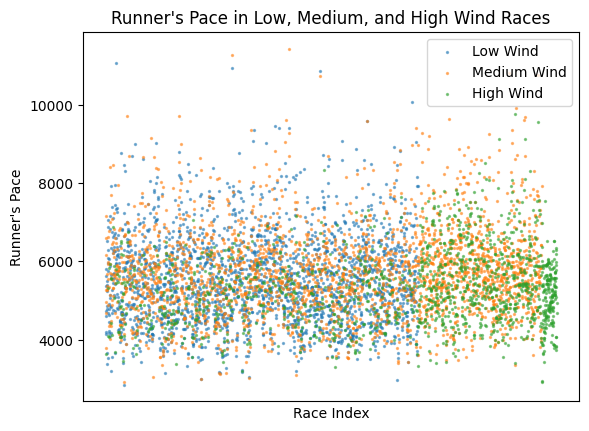

In [71]:

# Assuming you have a DataFrame 'df' with columns 'wind' and 'pace'

# Create a DataFrame for low, medium, and high wind races
low_wind_df = simplified_df[simplified_df['Wind_Binned'] == 'Low']
medium_wind_df = simplified_df[simplified_df['Wind_Binned'] == 'Medium']
high_wind_df = simplified_df[simplified_df['Wind_Binned'] == 'High']

# Plotting scatter plot for runner's pace in low wind races
plt.scatter(low_wind_df.index, low_wind_df['Time'], label='Low Wind', s=2, alpha=0.5)

# Plotting scatter plot for runner's pace in medium wind races
plt.scatter(medium_wind_df.index, medium_wind_df['Time'], label='Medium Wind', s=2, alpha=0.5)

# Plotting scatter plot for runner's pace in high wind races
plt.scatter(high_wind_df.index, high_wind_df['Time'], label='High Wind', s=2, alpha=0.5)

# Set labels and title
plt.xlabel('Race Index')
plt.xticks([])
plt.ylabel("Runner's Pace")
plt.title("Runner's Pace in Low, Medium, and High Wind Races")

# Add a legend
plt.legend()

# Show the plot
plt.show()


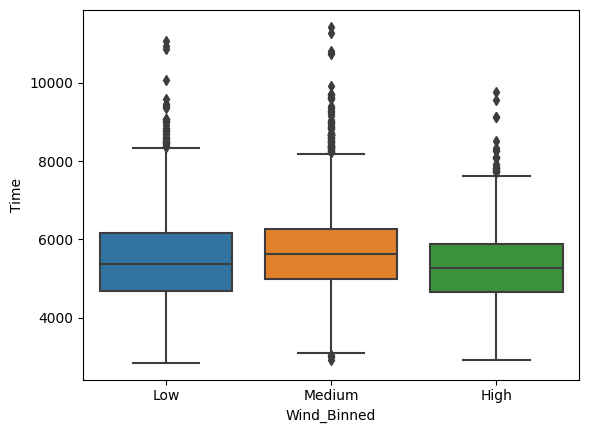

In [72]:
sns.boxplot(x='Wind_Binned', y='Time', data=simplified_df)
plt.show()

In [73]:
high_wind = simplified_df[simplified_df['Wind_Binned'] == 'High']
high_wind = high_wind.sort_values(by=['Time', 'Date'])
high_wind.value_counts()
medium_wind = simplified_df[simplified_df['Wind_Binned'] == 'Medium']
medium_wind = medium_wind.sort_values(by=['Time', 'Date'])
low_wind = simplified_df[simplified_df['Wind_Binned'] == 'Low']
low_wind = low_wind.sort_values(by=['Time', 'Date'])

In [74]:
high_wind.reset_index(inplace=True)
medium_wind.reset_index(inplace=True)

c:\Users\alexb\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: Glyph 9419 (\N{CIRCLED LATIN CAPITAL LETTER V}) missing from current font.
  self._figure.tight_layout(*args, **kwargs)
c:\Users\alexb\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: Glyph 128016 (\N{GOAT}) missing from current font.
  self._figure.tight_layout(*args, **kwargs)
c:\Users\alexb\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: Glyph 127988 (\N{WAVING BLACK FLAG}) missing from current font.
  self._figure.tight_layout(*args, **kwargs)
c:\Users\alexb\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: Glyph 917607 (\N{TAG LATIN SMALL LETTER G}) missing from current font.
  self._figure.tight_layout(*args, **kwargs)
c:\Users\alexb\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: Glyp

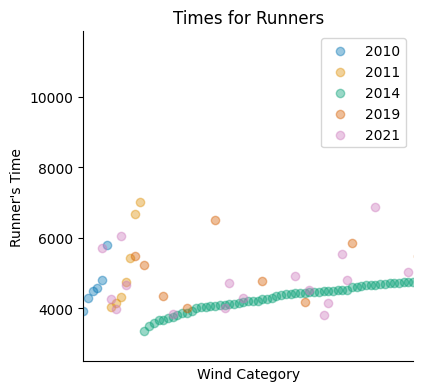

In [75]:
g = sns.FacetGrid(medium_wind, hue='Date', palette='colorblind')
g.map(plt.scatter, 'Name', 'Time', alpha=0.4)
#sns.scatterplot(x='Time', y='Time', data=medium_wind)
#sns.scatterplot(x='Time', y = 'Time', data=low_wind)
plt.subplots_adjust(left=0.6, right=1.7, bottom=0.6, top=1.7)
plt.xlabel('Wind Category')
plt.xlim(0,70)
plt.xticks([])
plt.ylabel('Runner\'s Time')
plt.title('Times for Runners')
plt.legend()
plt.show()

In [76]:
filtered_df = filtered_df[filtered_df['HR in bpm'].notnull()]

In [77]:
blah = filtered_df.Name.value_counts()

In [78]:
blah1 = blah[blah>1]

In [79]:
filtered_df

,Name,Date,Pace in /mi,HR in bpm,Time,Time_seconds,Run_year
Rank,,,,,,,
1,Jack Rowe,2021-10-17,04:41,171.0,00:47:21,2841,2021
3,Joshua Grace,2022-10-16,04:47,177.0,00:48:33,2913,2022
7,Dan Jarvis,2021-10-17,04:48,183.0,00:48:40,2920,2021
11,Charlie Davis,2022-10-16,04:51,178.0,00:49:13,2953,2022
12,Ben Alcock,2022-10-16,04:52,179.0,00:49:17,2957,2022
...,...,...,...,...,...,...,...
21608,Amanda Harris,2022-10-16,18:11,80.0,03:04:18,11058,2022
21610,Lauren Storey,2021-10-17,18:23,144.0,03:06:19,11179,2021
21611,Jean Morris,2021-10-17,18:33,139.0,03:07:54,11274,2021


In [80]:
attempt2 = filtered_df[filtered_df['Name'].isin(blah[blah > 1].index)]

In [81]:
attempt2

,Name,Date,Pace in /mi,HR in bpm,Time,Time_seconds,Run_year
Rank,,,,,,,
23,Jonny Roberts,2021-10-17,05:00,147.0,00:50:32,3032,2021
26,Chris Thomas,2021-10-17,05:01,179.0,00:50:45,3045,2021
29,Jonny Roberts,2018-10-21,05:03,175.0,00:50:57,3057,2018
42,J. Cornish,2019-10-20,05:08,133.0,00:51:52,3112,2019
51,J. Cornish,2018-10-21,05:13,142.0,00:52:32,3152,2018
...,...,...,...,...,...,...,...
21553,Sarah Doe,2019-10-20,15:47,156.0,02:39:53,9593,2019
21554,Sarah Doe,2018-10-21,15:52,146.0,02:39:56,9596,2018
21555,Solveig Gunnlaugsdottir,2019-10-20,15:48,159.0,02:40:06,9606,2019


In [82]:
attempt2.reset_index(inplace=True)

In [83]:
df_multi_hr = pd.merge(attempt2,df1, on='Date', how='left')

In [84]:
df_multi_hr.set_index('Name')

,Rank,Date,Pace in /mi,HR in bpm,Time,Time_seconds,Run_year,Rain_Total,Wind_Average,Temperature_Mean
Name,,,,,,,,,,
Jonny Roberts,23,2021-10-17,05:00,147.0,00:50:32,3032,2021,0.9,9.75,11.6
Chris Thomas,26,2021-10-17,05:01,179.0,00:50:45,3045,2021,0.9,9.75,11.6
Jonny Roberts,29,2018-10-21,05:03,175.0,00:50:57,3057,2018,0,4.3,8.3
J. Cornish,42,2019-10-20,05:08,133.0,00:51:52,3112,2019,0,11.575,6.9
J. Cornish,51,2018-10-21,05:13,142.0,00:52:32,3152,2018,0,4.3,8.3
...,...,...,...,...,...,...,...,...,...,...
Sarah Doe,21553,2019-10-20,15:47,156.0,02:39:53,9593,2019,0,11.575,6.9
Sarah Doe,21554,2018-10-21,15:52,146.0,02:39:56,9596,2018,0,4.3,8.3
Solveig Gunnlaugsdottir,21555,2019-10-20,15:48,159.0,02:40:06,9606,2019,0,11.575,6.9


In [85]:
df_multi_hr['Temperature_Mean'].value_counts()

Temperature_Mean
8.3     700
11.6    579
6.9     576
9.9     350
11.7    341
8.1     122
4.2      47
13.9     21
12.7     10
2.4       2
Name: count, dtype: int64

In [86]:
df_multi_hr['Wind_Average']=df_multi_hr['Wind_Average'].astype(float)
bins_wind = np.linspace(min(df_multi_hr['Wind_Average']), max(df_multi_hr['Wind_Average']), 4)
group_names = ['Low', 'Medium', 'High']
df_multi_hr['Wind_Binned'] = pd.cut(df_multi_hr['Wind_Average'], bins_wind, labels=group_names, include_lowest=True)


In [87]:
df_multi_hr['Temperature_Mean']=df_multi_hr['Temperature_Mean'].astype(float)
bins_temp = np.linspace(min(df_multi_hr['Temperature_Mean']), max(df_multi_hr['Temperature_Mean']), 4)
group_names = ['Low', 'Medium', 'High']
df_multi_hr['Temperature_Mean'] = pd.cut(df_multi_hr['Temperature_Mean'], bins_temp, labels=group_names, include_lowest=True)

In [88]:
df_multi_hr['Rain_Total']=df_multi_hr['Rain_Total'].astype(float)
bins_rain = np.linspace(min(df_multi_hr['Rain_Total']), max(df_multi_hr['Rain_Total']), 3)
group_names = ['None', 'Light']
df_multi_hr['Rain_Total'] = pd.cut(df_multi_hr['Rain_Total'], bins_rain, labels=group_names, include_lowest=True)

In [89]:
df_multi_hr.drop('Date',axis=1,inplace=True)

In [90]:
df_multi_hr.drop('Wind_Average', axis=1,inplace=True)

In [91]:
df_multi_hr['Temperature_Mean'].value_counts()

Temperature_Mean
Medium    1748
High       951
Low         49
Name: count, dtype: int64

In [92]:
bin_ranges = zip(bins_wind[:-1], bins_wind[1:])
for i, bin_range in enumerate(bin_ranges):
    left, right = bin_range
    print(f"Bin {i+1}: {left} - {right}")

Bin 1: 1.7 - 9.158333333333333
Bin 2: 9.158333333333333 - 16.616666666666667
Bin 3: 16.616666666666667 - 24.075


In [93]:
bin_ranges = zip(bins_temp[:-1], bins_temp[1:])
for i, bin_range in enumerate(bin_ranges):
    left, right = bin_range
    print(f"Bin {i+1}: {left} - {right}")

Bin 1: 2.4 - 6.233333333333333
Bin 2: 6.233333333333333 - 10.066666666666666
Bin 3: 10.066666666666666 - 13.9


In [94]:
df_multi_hr

,Rank,Name,Pace in /mi,HR in bpm,Time,Time_seconds,Run_year,Rain_Total,Temperature_Mean,Wind_Binned
0,23,Jonny Roberts,05:00,147.0,00:50:32,3032,2021,Light,High,Medium
1,26,Chris Thomas,05:01,179.0,00:50:45,3045,2021,Light,High,Medium
2,29,Jonny Roberts,05:03,175.0,00:50:57,3057,2018,None,Medium,Low
3,42,J. Cornish,05:08,133.0,00:51:52,3112,2019,None,Medium,Medium
4,51,J. Cornish,05:13,142.0,00:52:32,3152,2018,None,Medium,Low
...,...,...,...,...,...,...,...,...,...,...
2743,21553,Sarah Doe,15:47,156.0,02:39:53,9593,2019,None,Medium,Medium
2744,21554,Sarah Doe,15:52,146.0,02:39:56,9596,2018,None,Medium,Low
2745,21555,Solveig Gunnlaugsdottir,15:48,159.0,02:40:06,9606,2019,None,Medium,Medium
2746,21591,jane Rozee,16:38,159.0,02:47:41,10061,2018,None,Medium,Low


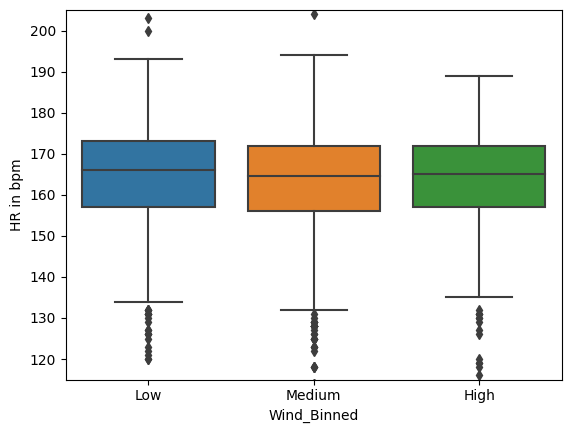

In [95]:
sns.boxplot(x='Wind_Binned', y='HR in bpm', data=df_multi_hr)
plt.ylim(115,205)
plt.show()

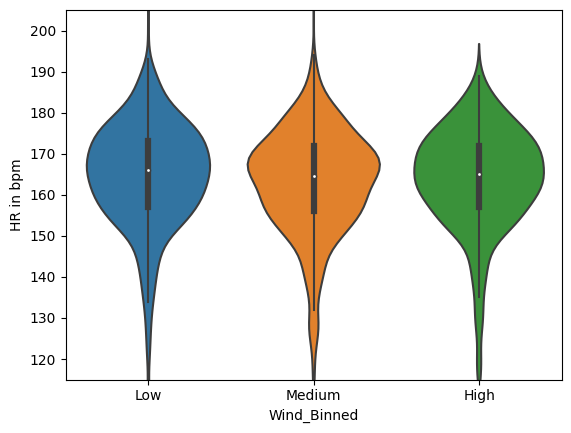

In [96]:
sns.violinplot(data=df_multi_hr,x='Wind_Binned', y='HR in bpm')
plt.ylim(115,205)
plt.show()

In [97]:
df['Date'] = df.Date.dt.year

In [98]:
df = df_merged

In [99]:
df

,Name,Date,Pace in /mi,HR in bpm,Time,Time_seconds,Rain_Total,Wind_Average,Temperature_Mean
0,Jack Rowe,2021,04:41,171.0,00:47:21,2841,0.9,9.75,11.6
1,Andy Vernon,2018,04:43,NaN,00:47:31,2851,0,4.3,8.3
2,Joshua Grace,2022,04:47,177.0,00:48:33,2913,0,5.45,11.7
3,Alex Teuten,2017,04:49,NaN,00:48:34,2914,0,19.25,9.9
4,Ben Connor,2017,04:49,NaN,00:48:35,2915,0,19.25,9.9
...,...,...,...,...,...,...,...,...,...
21578,Lauren Storey,2021,18:23,144.0,03:06:19,11179,0.9,9.75,11.6
21579,Jean Morris,2021,18:33,139.0,03:07:54,11274,0.9,9.75,11.6
21580,Luke Edmunds,2017,18:49,NaN,03:09:41,11381,0,19.25,9.9
21581,Marie Stopinski NaNWheeler,2021,18:48,123.0,03:10:31,11431,0.9,9.75,11.6


In [100]:
# df =df[df['Date']>2016]

In [101]:
df.groupby('Date').Wind_Average.value_counts()

Date  Wind_Average
2010  9.85              29
2011  15.95             57
2012  9.125            175
2013  24.075           387
2014  14.35            764
2015  1.7             1147
2016  17.65           2071
2017  19.25           3290
2018  4.3             3916
2019  11.575          3442
2021  9.75            4253
2022  5.45            2052
Name: count, dtype: int64

In [102]:
df['Wind_Average']=df['Wind_Average'].astype(float)
bins_wind = np.linspace(min(df['Wind_Average']), max(df['Wind_Average']), 4)
group_names = ['Low','Medium', 'High']
df['Wind_Binned'] = pd.cut(df['Wind_Average'], bins_wind, labels=group_names, include_lowest=True)

In [103]:
df

,Name,Date,Pace in /mi,HR in bpm,Time,Time_seconds,Rain_Total,Wind_Average,Temperature_Mean,Wind_Binned
0,Jack Rowe,2021,04:41,171.0,00:47:21,2841,0.9,9.750,11.6,Medium
1,Andy Vernon,2018,04:43,NaN,00:47:31,2851,0,4.300,8.3,Low
2,Joshua Grace,2022,04:47,177.0,00:48:33,2913,0,5.450,11.7,Low
3,Alex Teuten,2017,04:49,NaN,00:48:34,2914,0,19.250,9.9,High
4,Ben Connor,2017,04:49,NaN,00:48:35,2915,0,19.250,9.9,High
...,...,...,...,...,...,...,...,...,...,...
21578,Lauren Storey,2021,18:23,144.0,03:06:19,11179,0.9,9.750,11.6,Medium
21579,Jean Morris,2021,18:33,139.0,03:07:54,11274,0.9,9.750,11.6,Medium
21580,Luke Edmunds,2017,18:49,NaN,03:09:41,11381,0,19.250,9.9,High
21581,Marie Stopinski NaNWheeler,2021,18:48,123.0,03:10:31,11431,0.9,9.750,11.6,Medium


In [104]:
df['Temperature_Mean']=df['Temperature_Mean'].astype(float)
bins_temp = np.linspace(min(df['Temperature_Mean']), max(df['Temperature_Mean']), 4)
group_names = ['Low', 'Medium', 'High']
df['Temperature_Mean'] = pd.cut(df['Temperature_Mean'], bins_temp, labels=group_names, include_lowest=True)

In [105]:
df['Rain_Total']=df['Rain_Total'].astype(float)
bins_rain = np.linspace(min(df['Rain_Total']), max(df['Rain_Total']), 3)
group_names = ['None', 'Light']
df['Rain_Total'] = pd.cut(df['Rain_Total'], bins_rain, labels=group_names, include_lowest=True)

In [106]:
df.drop('Wind_Average', axis=1,inplace=True)

In [107]:
df

,Name,Date,Pace in /mi,HR in bpm,Time,Time_seconds,Rain_Total,Temperature_Mean,Wind_Binned
0,Jack Rowe,2021,04:41,171.0,00:47:21,2841,Light,High,Medium
1,Andy Vernon,2018,04:43,NaN,00:47:31,2851,None,Medium,Low
2,Joshua Grace,2022,04:47,177.0,00:48:33,2913,None,High,Low
3,Alex Teuten,2017,04:49,NaN,00:48:34,2914,None,Medium,High
4,Ben Connor,2017,04:49,NaN,00:48:35,2915,None,Medium,High
...,...,...,...,...,...,...,...,...,...
21578,Lauren Storey,2021,18:23,144.0,03:06:19,11179,Light,High,Medium
21579,Jean Morris,2021,18:33,139.0,03:07:54,11274,Light,High,Medium
21580,Luke Edmunds,2017,18:49,NaN,03:09:41,11381,None,Medium,High
21581,Marie Stopinski NaNWheeler,2021,18:48,123.0,03:10:31,11431,Light,High,Medium


In [108]:
df_multi_hr

,Rank,Name,Pace in /mi,HR in bpm,Time,Time_seconds,Run_year,Rain_Total,Temperature_Mean,Wind_Binned
0,23,Jonny Roberts,05:00,147.0,00:50:32,3032,2021,Light,High,Medium
1,26,Chris Thomas,05:01,179.0,00:50:45,3045,2021,Light,High,Medium
2,29,Jonny Roberts,05:03,175.0,00:50:57,3057,2018,None,Medium,Low
3,42,J. Cornish,05:08,133.0,00:51:52,3112,2019,None,Medium,Medium
4,51,J. Cornish,05:13,142.0,00:52:32,3152,2018,None,Medium,Low
...,...,...,...,...,...,...,...,...,...,...
2743,21553,Sarah Doe,15:47,156.0,02:39:53,9593,2019,None,Medium,Medium
2744,21554,Sarah Doe,15:52,146.0,02:39:56,9596,2018,None,Medium,Low
2745,21555,Solveig Gunnlaugsdottir,15:48,159.0,02:40:06,9606,2019,None,Medium,Medium
2746,21591,jane Rozee,16:38,159.0,02:47:41,10061,2018,None,Medium,Low


In [109]:
df_multi_hr.groupby('Wind_Binned').Name.value_counts()


Wind_Binned  Name                            
Low          Gary Lee 🐐                          2
             Sam Midgley                         2
             Helen Wilkins                       2
             Sara Lee                            2
             Sarah Abrahams NaNBurrows 🏃‍♀️ 🌈    2
                                                ..
High         Adrian Tansley                      0
             Adrian Hopgood                      0
             Adam OHara                          0
             Adam Dart                           0
             🪶Christy Buckland 🕊                 0
Name: count, Length: 3885, dtype: int64

(2000.0, 10000.0)

c:\Users\alexb\AppData\Local\Programs\Python\Python311\Lib\site-packages\IPython\core\events.py:89: UserWarning: Glyph 129417 (\N{OWL}) missing from current font.
  func(*args, **kwargs)
c:\Users\alexb\AppData\Local\Programs\Python\Python311\Lib\site-packages\IPython\core\events.py:89: UserWarning: Glyph 129428 (\N{HEDGEHOG}) missing from current font.
  func(*args, **kwargs)
c:\Users\alexb\AppData\Local\Programs\Python\Python311\Lib\site-packages\IPython\core\events.py:89: UserWarning: Glyph 129445 (\N{SLOTH}) missing from current font.
  func(*args, **kwargs)
c:\Users\alexb\AppData\Local\Programs\Python\Python311\Lib\site-packages\IPython\core\events.py:89: UserWarning: Glyph 127939 (\N{RUNNER}) missing from current font.
  func(*args, **kwargs)
c:\Users\alexb\AppData\Local\Programs\Python\Python311\Lib\site-packages\IPython\core\events.py:89: UserWarning: Glyph 127866 (\N{BEER MUG}) missing from current font.
  func(*args, **kwargs)
c:\Users\alexb\AppData\Local\Programs\Python\Pytho

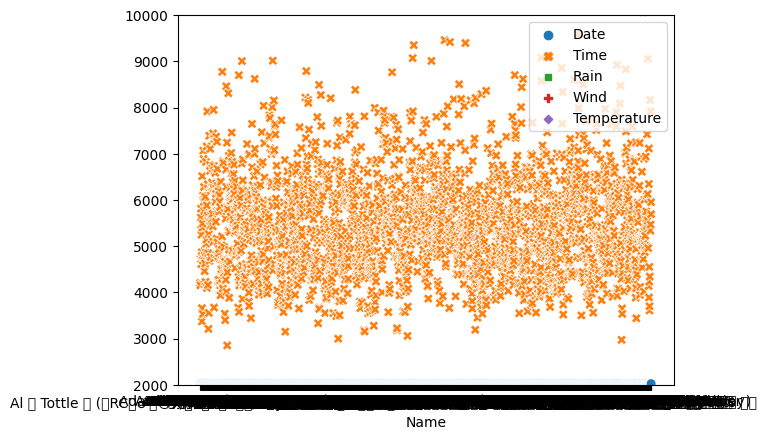

In [110]:
sns.scatterplot(data=low_wind_df,s=50, alpha=1)
plt.ylim(2000,10000)

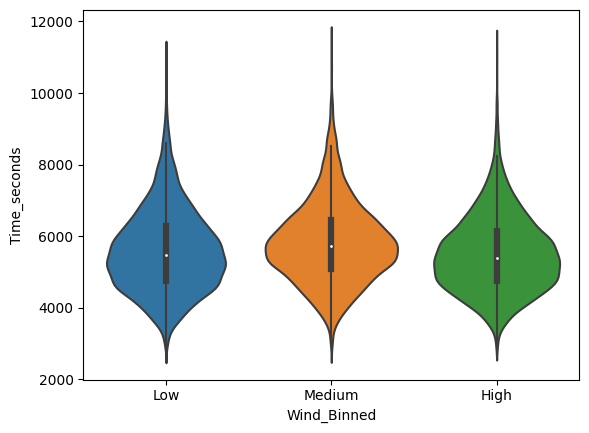

In [111]:
sns.violinplot(data=df,x='Wind_Binned', y='Time_seconds')
plt.show()

In [112]:
repeat_runners = df_merged.groupby('Name').filter(lambda x: len(x) > 1)['Name'].unique()
repeat_runners

array(['Andy Vernon', 'Alex Teuten', 'Tom Evans', ..., 'Sarah Doe',
       'Nic Baglee', 'Jean Morris'], dtype=object)

In [113]:
repeat_runners_df = df_merged[df_merged['Name'].isin(repeat_runners)].copy()

In [114]:
high_wind_run = df_merged.groupby('Name').filter(lambda x: (x['Wind_Binned'] == 'High').any())['Name']


In [115]:
common_names = np.intersect1d(repeat_runners, high_wind_run)


In [116]:
high_plus = df_merged[df_merged['Name'].isin(common_names)].copy()
high_plus

,Name,Date,Pace in /mi,HR in bpm,Time,Time_seconds,Rain_Total,Temperature_Mean,Wind_Binned
3,Alex Teuten,2017,04:49,NaN,00:48:34,2914,None,Medium,High
9,Alex Teuten,2016,04:50,NaN,00:49:09,2949,None,Medium,High
15,Tom Evans,2018,04:55,152.0,00:49:32,2972,None,Medium,Low
56,Joe Croft,2018,05:12,NaN,00:53:00,3180,None,Medium,Low
59,Joe Croft,2016,05:16,NaN,00:53:08,3188,None,Medium,High
...,...,...,...,...,...,...,...,...,...
21545,Richie Appleton,2016,16:07,NaN,02:42:33,9753,None,Medium,High
21556,Robin Greenfield,2019,16:18,NaN,02:45:12,9912,None,Medium,Medium
21572,d482williams@btinternet.com Williams,2019,17:41,NaN,02:59:10,10750,None,Medium,Medium
21573,Paula Stockley,2019,17:46,NaN,03:00:06,10806,None,Medium,Medium


In [117]:
high_plus['Wind_Binned'].value_counts()

Wind_Binned
High      1440
Medium     916
Low        589
Name: count, dtype: int64

In [118]:
fast_times = high_plus[high_plus['Time_seconds']>3900]
fast_times['Wind_Binned'].value_counts()

Wind_Binned
High      1378
Medium     894
Low        553
Name: count, dtype: int64

In [119]:
df

,Name,Date,Pace in /mi,HR in bpm,Time,Time_seconds,Rain_Total,Temperature_Mean,Wind_Binned
0,Jack Rowe,2021,04:41,171.0,00:47:21,2841,Light,High,Medium
1,Andy Vernon,2018,04:43,NaN,00:47:31,2851,None,Medium,Low
2,Joshua Grace,2022,04:47,177.0,00:48:33,2913,None,High,Low
3,Alex Teuten,2017,04:49,NaN,00:48:34,2914,None,Medium,High
4,Ben Connor,2017,04:49,NaN,00:48:35,2915,None,Medium,High
...,...,...,...,...,...,...,...,...,...
21578,Lauren Storey,2021,18:23,144.0,03:06:19,11179,Light,High,Medium
21579,Jean Morris,2021,18:33,139.0,03:07:54,11274,Light,High,Medium
21580,Luke Edmunds,2017,18:49,NaN,03:09:41,11381,None,Medium,High
21581,Marie Stopinski NaNWheeler,2021,18:48,123.0,03:10:31,11431,Light,High,Medium


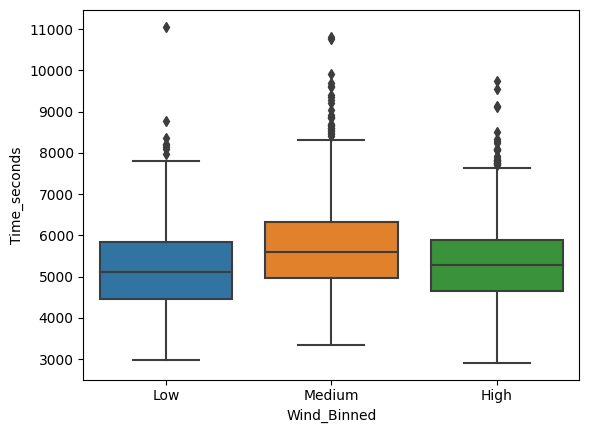

In [120]:
sns.boxplot(x='Wind_Binned', y='Time_seconds', data=high_plus)
# plt.ylim(115,205)
plt.show()

In [121]:
first_second_runs_df = repeat_runners_df.groupby('Name').apply(lambda x: x.nsmallest(2, 'Date')).reset_index(drop=True)


In [122]:
# # Create a boxplot comparing the first and second runs
# data = [
#     first_second_runs_df[first_second_runs_df['Name'] == runner]['Time_seconds'].values
#     for runner in first_second_runs_df['Name'].unique()
# ]
# labels = ['First Run', 'Second Run']  # Labels for the boxplot

# plt.figure(figsize=(8, 6))
# plt.boxplot(data)
# plt.title('Comparison of First and Second Runs')
# plt.xlabel('Run')
# plt.ylabel('Time')
# plt.show()

In [123]:
# for runner in repeat_runners:
#     runner_data = df_merged[df_merged['Name'] == runner & (df['Wind_Binned'] == 'High')]
#     plt.scatter(runner_data['Wind_Binned'], runner_data['Time_seconds'])
#     for runner1 in runner_data:
#         runner_data1 = df_merged[df_merged['Name']== runner1 & (df['Wind_Binned'] != 'High')]
#         plt.scatter(runner_data1['Wind_Binned'], runner_data1['Time_seconds'])
# plt.xlabel('Wind Condition')
# plt.ylabel('Finishing Time')
# plt.title('Comparison of Finishing Times for Repeat Runners')
# plt.show()

In [124]:

# repeat_runners = df.groupby('Name').filter(lambda x: len(x) > 1)['Name'].unique()

# for runner in repeat_runners:
#     runner_data_high = df[(df['Name'] == runner) & (df['Wind_Binned'] == 'High')]
#     runner_data_other = df[(df['Name'] == runner) & (df['Wind_Binned'] != 'High')]
    
#     if not runner_data_high.empty:        
#         sns.boxplot(x='Wind_Binned', y='Time_seconds', data=runner_data_high)
#         # plt.scatter(runner_data_high['Wind_Binned'], runner_data_high['Time_seconds'])
#         # plt.scatter(runner_data_other['Wind_Binned'], runner_data_other['Time_seconds'], color='gray', alpha=0.5)
#         sns.boxplot(x='Wind_Binned', y='Time_seconds', data=runner_data_other)

# plt.xlabel('Wind Condition')
# plt.ylabel('Finishing Time')
# plt.title('Comparison of Finishing Times for Repaeat Runners')
# plt.show()

In [125]:
# repeat_runners = df.groupby('Name').filter(lambda x: len(x) > 1)['Name'].unique()

# fig, ax = plt.subplots()

# for runner in repeat_runners:
#     runner_data_high = df[(df['Name'] == runner) & (df['Wind_Binned'] == 'High')]
#     runner_data_other = df[(df['Name'] == runner) & (df['Wind_Binned'] != 'High')]
    
#     if not runner_data_high.empty:
#         sns.boxplot(x='Wind_Binned', y='Time_seconds', data=runner_data_high)
        
#     if not runner_data_other.empty:
#         sns.boxplot(x='Wind_Binned', y='Time_seconds', data=runner_data_other)

# plt.xlabel('Wind Condition')
# plt.ylabel('Finishing Time (seconds)')
# plt.title('Comparison of Finishing Times for Repeat Runners')
# plt.show()

In [126]:
from scipy.stats import zscore


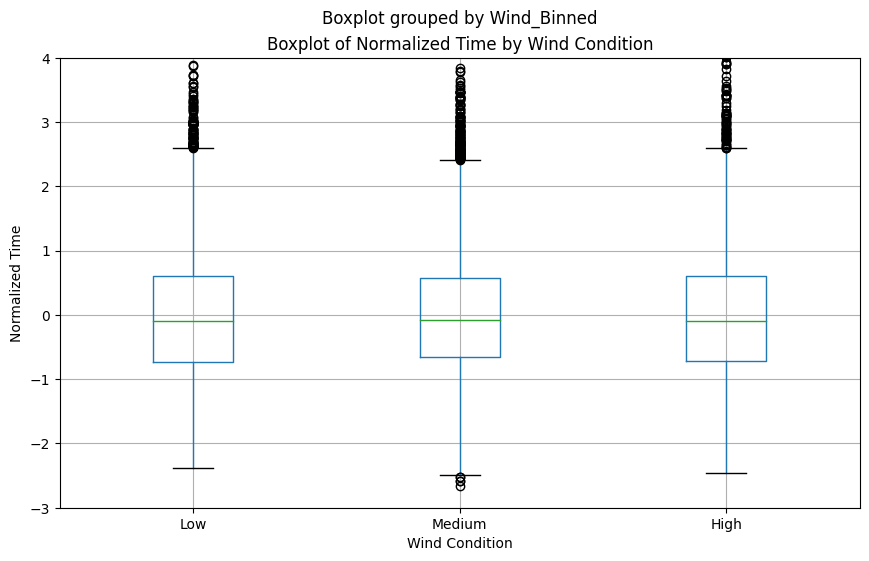

In [127]:

# Assuming your DataFrame is called 'df'
grouped = df.groupby('Wind_Binned')

# Calculate the median 'Time_seconds' for each wind condition group
median_times = grouped['Time_seconds'].median()

# Normalize 'Time_seconds' using z-scores within each wind condition group
df['Normalized_Time'] = grouped['Time_seconds'].transform(lambda x: zscore(x, ddof=0))

# Generate boxplot with the normalized 'Time_seconds'
plt.figure(figsize=(10, 6))
df.boxplot(column='Normalized_Time', by='Wind_Binned', ax=plt.gca())
plt.title("Boxplot of Normalized Time by Wind Condition")
plt.xlabel("Wind Condition")
plt.ylim(-3,4)
plt.ylabel("Normalized Time")
plt.show()

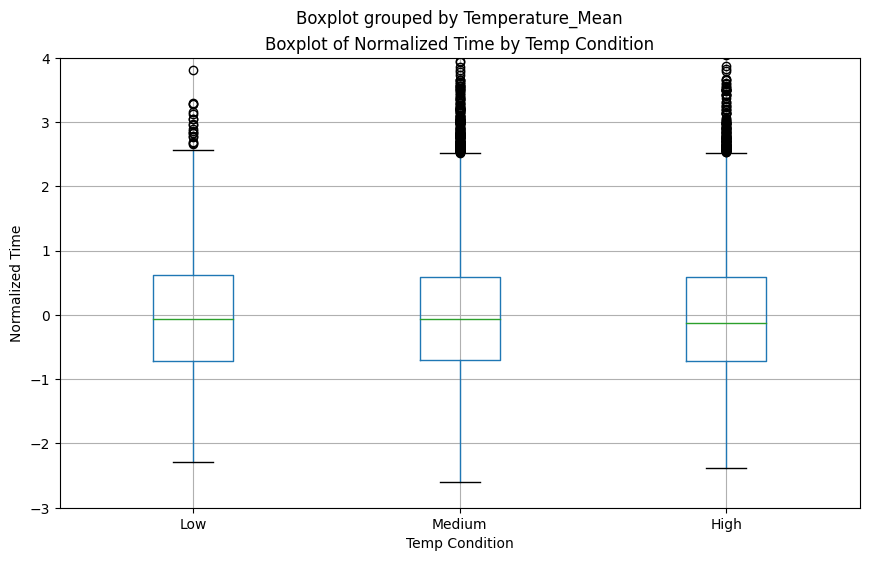

In [128]:

# Assuming your DataFrame is called 'df'
grouped_temp = df.groupby('Temperature_Mean')

# Calculate the median 'Time_seconds' for each wind condition group
median_times = grouped_temp['Time_seconds'].median()

# Normalize 'Time_seconds' using z-scores within each wind condition group
df['Normalised_Temp'] = grouped_temp['Time_seconds'].transform(lambda x: zscore(x, ddof=0))

# Generate boxplot with the normalized 'Time_seconds'
plt.figure(figsize=(10, 6))
df.boxplot(column='Normalised_Temp', by='Temperature_Mean', ax=plt.gca())
plt.title("Boxplot of Normalized Time by Temp Condition")
plt.xlabel("Temp Condition")
plt.ylim(-3,4)
plt.ylabel("Normalized Time")
plt.show()

In [129]:
repeat_runners_df

,Name,Date,Pace in /mi,HR in bpm,Time,Time_seconds,Rain_Total,Temperature_Mean,Wind_Binned
1,Andy Vernon,2018,04:43,NaN,00:47:31,2851,None,Medium,Low
3,Alex Teuten,2017,04:49,NaN,00:48:34,2914,None,Medium,High
5,Andy Vernon,2019,04:49,NaN,00:48:39,2919,None,Medium,Medium
9,Alex Teuten,2016,04:50,NaN,00:49:09,2949,None,Medium,High
15,Tom Evans,2018,04:55,152.0,00:49:32,2972,None,Medium,Low
...,...,...,...,...,...,...,...,...,...
21574,Nic Baglee,2018,17:57,NaN,03:01:03,10863,None,Medium,Low
21575,Jean Morris,2018,18:05,NaN,03:02:18,10938,None,Medium,Low
21576,Amanda Harris,2022,18:11,80.0,03:04:18,11058,None,High,Low
21579,Jean Morris,2021,18:33,139.0,03:07:54,11274,Light,High,Medium


In [130]:
# Assuming your DataFrame is called 'repeat_runners_df'
# Normalize based on multiple runs
# repeat_runners_df['Average_Time'] =repeat_runners_df.groupby('Name')['Time_seconds'].transform('mean')
# repeat_runners_df['Normalized_Time'] =repeat_runners_df.groupby('Name')['Time_seconds'].transform(lambda x: zscore(x, ddof=0))

# # Comparison of pace between first and subsequent years
# repeat_runners_df['Date'] = pd.to_datetime(repeat_runners_df['Date']).dt.year
# first_year_pace =repeat_runners_df[repeat_runners_df['Date'] ==repeat_runners_df.groupby('Name')['Date'].transform('min')]['Time_seconds'].mean()
# subsequent_year_pace =repeat_runners_df[repeat_runners_df['Date'] >repeat_runners_df.groupby('Name')['Date'].transform('min')]['Time_seconds'].mean()

# # Print the comparison of pace
# print("Average pace in the first year:", first_year_pace)
# print("Average pace in subsequent years:", subsequent_year_pace)

In [131]:
# first_year_pace =repeat_runners_df[repeat_runners_df['Date'] ==repeat_runners_df.groupby('Name')['Date'].transform('min')]['Time_seconds']
# first_year_pace

In [132]:
# subsequent_year_pace =repeat_runners_df[repeat_runners_df['Date'] >repeat_runners_df.groupby('Name')['Date'].transform('min')]['Time_seconds']
# subsequent_year_pace

In [133]:
repeat_runners_df

,Name,Date,Pace in /mi,HR in bpm,Time,Time_seconds,Rain_Total,Temperature_Mean,Wind_Binned
1,Andy Vernon,2018,04:43,NaN,00:47:31,2851,None,Medium,Low
3,Alex Teuten,2017,04:49,NaN,00:48:34,2914,None,Medium,High
5,Andy Vernon,2019,04:49,NaN,00:48:39,2919,None,Medium,Medium
9,Alex Teuten,2016,04:50,NaN,00:49:09,2949,None,Medium,High
15,Tom Evans,2018,04:55,152.0,00:49:32,2972,None,Medium,Low
...,...,...,...,...,...,...,...,...,...
21574,Nic Baglee,2018,17:57,NaN,03:01:03,10863,None,Medium,Low
21575,Jean Morris,2018,18:05,NaN,03:02:18,10938,None,Medium,Low
21576,Amanda Harris,2022,18:11,80.0,03:04:18,11058,None,High,Low
21579,Jean Morris,2021,18:33,139.0,03:07:54,11274,Light,High,Medium


In [134]:
repeat_runners_df.sort_values(by=['Name', 'Date'], inplace=True)


In [135]:
repeat_runners_df['Time_Difference'] = repeat_runners_df.groupby('Name')['Time_seconds'].transform(lambda x: x.diff())

In [136]:
repeat_runners_df.sort_values(by='Time_seconds', inplace=True)

In [137]:
repeat_runners_df

,Name,Date,Pace in /mi,HR in bpm,Time,Time_seconds,Rain_Total,Temperature_Mean,Wind_Binned,Time_Difference
1,Andy Vernon,2018,04:43,NaN,00:47:31,2851,None,Medium,Low,NaN
3,Alex Teuten,2017,04:49,NaN,00:48:34,2914,None,Medium,High,-35.0
5,Andy Vernon,2019,04:49,NaN,00:48:39,2919,None,Medium,Medium,68.0
9,Alex Teuten,2016,04:50,NaN,00:49:09,2949,None,Medium,High,NaN
15,Tom Evans,2018,04:55,152.0,00:49:32,2972,None,Medium,Low,-2043.0
...,...,...,...,...,...,...,...,...,...,...
21574,Nic Baglee,2018,17:57,NaN,03:01:03,10863,None,Medium,Low,NaN
21575,Jean Morris,2018,18:05,NaN,03:02:18,10938,None,Medium,Low,NaN
21576,Amanda Harris,2022,18:11,80.0,03:04:18,11058,None,High,Low,5258.0
21579,Jean Morris,2021,18:33,139.0,03:07:54,11274,Light,High,Medium,336.0


In [138]:
column = 'Time_Difference'
repeat_run_difference = repeat_runners_df.dropna(subset=[column])

In [139]:
repeat_run_difference

,Name,Date,Pace in /mi,HR in bpm,Time,Time_seconds,Rain_Total,Temperature_Mean,Wind_Binned,Time_Difference
3,Alex Teuten,2017,04:49,NaN,00:48:34,2914,None,Medium,High,-35.0
5,Andy Vernon,2019,04:49,NaN,00:48:39,2919,None,Medium,Medium,68.0
15,Tom Evans,2018,04:55,152.0,00:49:32,2972,None,Medium,Low,-2043.0
19,George Beardmore,2022,04:56,NaN,00:49:57,2997,None,High,Low,-1.0
22,Jonny Roberts,2021,05:00,147.0,00:50:32,3032,Light,High,Medium,-25.0
...,...,...,...,...,...,...,...,...,...,...
21572,d482williams@btinternet.com Williams,2019,17:41,NaN,02:59:10,10750,None,Medium,Medium,1193.0
21573,Paula Stockley,2019,17:46,NaN,03:00:06,10806,None,Medium,Medium,3560.0
21576,Amanda Harris,2022,18:11,80.0,03:04:18,11058,None,High,Low,5258.0
21579,Jean Morris,2021,18:33,139.0,03:07:54,11274,Light,High,Medium,336.0


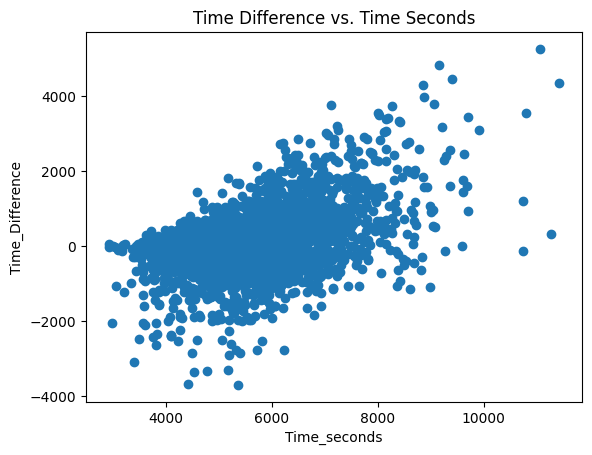

In [140]:
plt.scatter(repeat_run_difference['Time_seconds'], repeat_run_difference['Time_Difference'])
plt.xlabel('Time_seconds')
plt.ylabel('Time_Difference')
plt.title('Time Difference vs. Time Seconds')
plt.show()

In [141]:
correlation = repeat_run_difference['Time_seconds'].corr(repeat_run_difference['Time_Difference'])
correlation

0.45345294009385345

<Axes: xlabel='Time_seconds', ylabel='Time_Difference'>

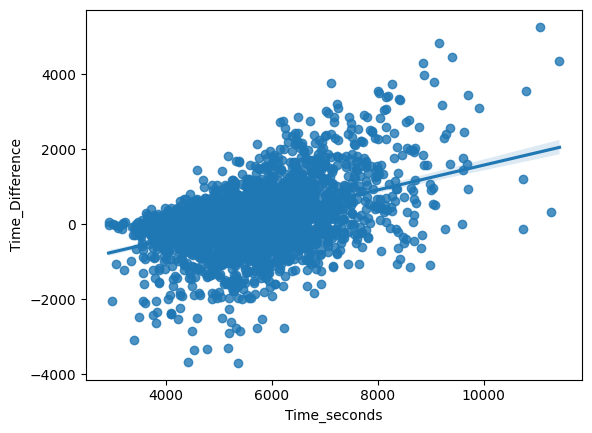

In [142]:
sns.regplot(x='Time_seconds',y='Time_Difference', data=repeat_run_difference)

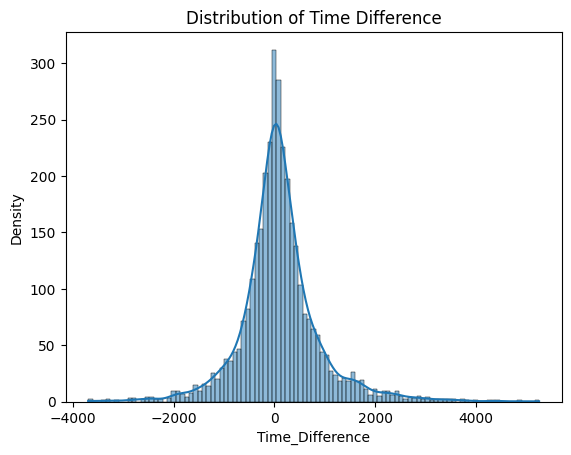

In [143]:
sns.histplot(data=repeat_run_difference, x='Time_Difference', kde=True)
plt.xlabel('Time_Difference')
plt.ylabel('Density')
plt.title('Distribution of Time Difference')
plt.show()

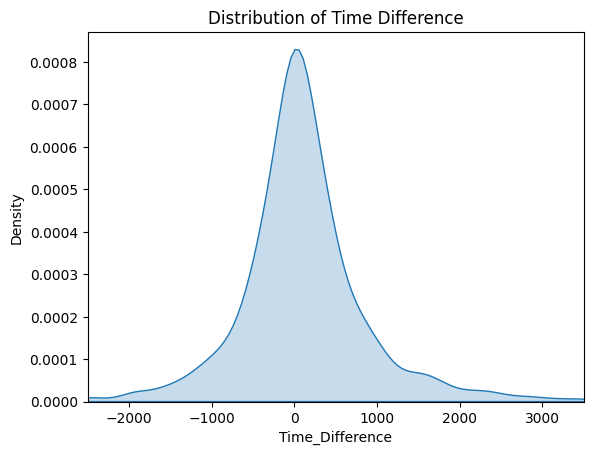

In [144]:
sns.kdeplot(data=repeat_run_difference['Time_Difference'], fill=True)
plt.xlabel('Time_Difference')
plt.ylabel('Density')
plt.title('Distribution of Time Difference')
plt.xlim(-2500,3500)
plt.show()

In [145]:
df_copy = df

In [146]:
df_copy['DateWind'] = df['Date'].astype(str) + ":" + df['Wind_Binned'].astype(str)


In [147]:
df_copy['DateTemp'] = df['Date'].astype(str) + ":" + df['Temperature_Mean'].astype(str)

In [148]:
df_copy

,Name,Date,Pace in /mi,HR in bpm,Time,Time_seconds,Rain_Total,Temperature_Mean,Wind_Binned,Normalized_Time,Normalised_Temp,DateWind,DateTemp
0,Jack Rowe,2021,04:41,171.0,00:47:21,2841,Light,High,Medium,-2.659210,-2.374789,2021:Medium,2021:High
1,Andy Vernon,2018,04:43,NaN,00:47:31,2851,None,Medium,Low,-2.383210,-2.606740,2018:Low,2018:Medium
2,Joshua Grace,2022,04:47,177.0,00:48:33,2913,None,High,Low,-2.329393,-2.313206,2022:Low,2022:High
3,Alex Teuten,2017,04:49,NaN,00:48:34,2914,None,Medium,High,-2.453464,-2.549550,2017:High,2017:Medium
4,Ben Connor,2017,04:49,NaN,00:48:35,2915,None,Medium,High,-2.452519,-2.548642,2017:High,2017:Medium
...,...,...,...,...,...,...,...,...,...,...,...,...,...
21578,Lauren Storey,2021,18:23,144.0,03:06:19,11179,Light,High,Medium,4.777363,4.756948,2021:Medium,2021:High
21579,Jean Morris,2021,18:33,139.0,03:07:54,11274,Light,High,Medium,4.862093,4.838205,2021:Medium,2021:High
21580,Luke Edmunds,2017,18:49,NaN,03:09:41,11381,None,Medium,High,5.552831,5.136547,2017:High,2017:Medium
21581,Marie Stopinski NaNWheeler,2021,18:48,123.0,03:10:31,11431,Light,High,Medium,5.002119,4.972491,2021:Medium,2021:High


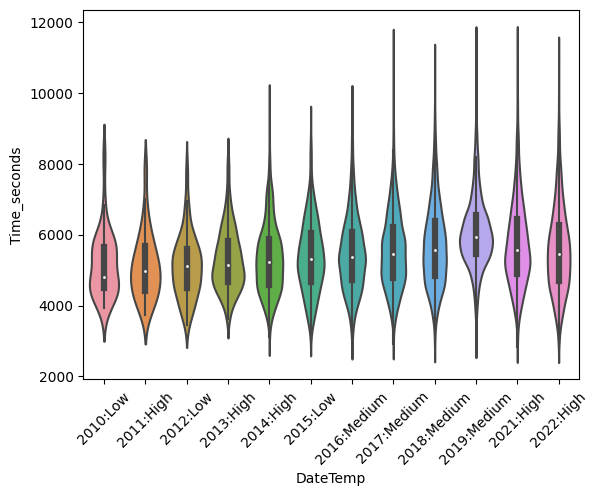

In [149]:
df_copy = df_copy.sort_values('Date')

sns.violinplot(x='DateTemp', y='Time_seconds', data=df_copy)
# Accessing 'Date' and 'Wind_Conditions' columns and combining them with a dash

# Rotating the x-axis labels for better readability
plt.xticks(rotation=45)


# Displaying the plot
plt.show()

In [150]:
df

,Name,Date,Pace in /mi,HR in bpm,Time,Time_seconds,Rain_Total,Temperature_Mean,Wind_Binned,Normalized_Time,Normalised_Temp,DateWind,DateTemp
0,Jack Rowe,2021,04:41,171.0,00:47:21,2841,Light,High,Medium,-2.659210,-2.374789,2021:Medium,2021:High
1,Andy Vernon,2018,04:43,NaN,00:47:31,2851,None,Medium,Low,-2.383210,-2.606740,2018:Low,2018:Medium
2,Joshua Grace,2022,04:47,177.0,00:48:33,2913,None,High,Low,-2.329393,-2.313206,2022:Low,2022:High
3,Alex Teuten,2017,04:49,NaN,00:48:34,2914,None,Medium,High,-2.453464,-2.549550,2017:High,2017:Medium
4,Ben Connor,2017,04:49,NaN,00:48:35,2915,None,Medium,High,-2.452519,-2.548642,2017:High,2017:Medium
...,...,...,...,...,...,...,...,...,...,...,...,...,...
21578,Lauren Storey,2021,18:23,144.0,03:06:19,11179,Light,High,Medium,4.777363,4.756948,2021:Medium,2021:High
21579,Jean Morris,2021,18:33,139.0,03:07:54,11274,Light,High,Medium,4.862093,4.838205,2021:Medium,2021:High
21580,Luke Edmunds,2017,18:49,NaN,03:09:41,11381,None,Medium,High,5.552831,5.136547,2017:High,2017:Medium
21581,Marie Stopinski NaNWheeler,2021,18:48,123.0,03:10:31,11431,Light,High,Medium,5.002119,4.972491,2021:Medium,2021:High


In [151]:
df_2018 = df[df['Date'] < 2023]

In [152]:
df_2018['Temperature_Mean'].value_counts()

Temperature_Mean
Medium    12719
High       7513
Low        1351
Name: count, dtype: int64

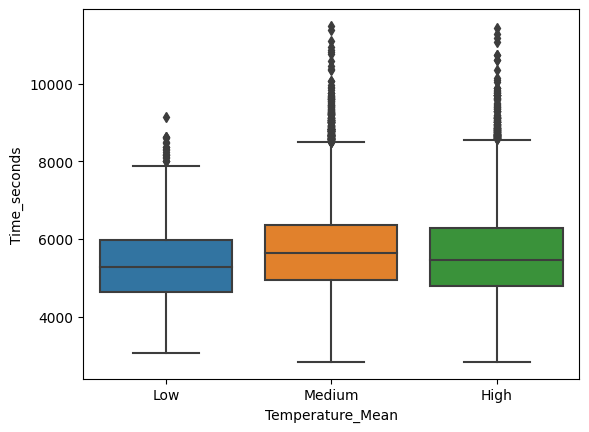

In [153]:
sns.boxplot(x='Temperature_Mean', y='Time_seconds', data=df_2018)
# plt.ylim(115,205)
plt.show()

In [154]:
bin_ranges = df_2018.groupby('Temperature_Mean')['Temperature_Mean'].agg(['min', 'max'])
bin_ranges

,min,max
Temperature_Mean,,
Low,Low,Low
Medium,Medium,Medium
High,High,High
